In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns; sns.set(style = 'darkgrid')
import requests
from io import StringIO
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz 
from IPython.display import Image  
#import pydotplus
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
data = pd.read_csv('./Desktop/DATASET/corona_tested_individuals_ver_0083.english.csv')

In [3]:
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742596 entries, 0 to 2742595
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 209.2+ MB


In [5]:
data.corona_result.value_counts()

negative    2480403
positive     220975
other         41218
Name: corona_result, dtype: int64

In [6]:
data.test_indication.value_counts()

Other                     2547559
Contact with confirmed     170742
Abroad                      24295
Name: test_indication, dtype: int64

In [7]:
data.age_60_and_above.value_counts()

No     1908553
Yes     286399
Name: age_60_and_above, dtype: int64

In [8]:
data.head_ache.value_counts()

0    2682655
1      59941
Name: head_ache, dtype: int64

In [9]:
data.fever.value_counts()

0    2645600
1      96996
Name: fever, dtype: int64

In [10]:
data.gender.value_counts()

female    1371444
male      1278266
Name: gender, dtype: int64

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cough,2742596.0,0.040596,0.197352,0.0,0.0,0.0,0.0,1.0
fever,2742596.0,0.035366,0.184704,0.0,0.0,0.0,0.0,1.0
sore_throat,2742596.0,0.010969,0.104158,0.0,0.0,0.0,0.0,1.0
shortness_of_breath,2742596.0,0.004017,0.063252,0.0,0.0,0.0,0.0,1.0
head_ache,2742596.0,0.021856,0.146212,0.0,0.0,0.0,0.0,1.0


In [12]:
print(f'The shape is {data.shape} and the size is {data.size}')

The shape is (2742596, 10) and the size is 27425960


In [13]:
data.isna().any()

test_date              False
cough                  False
fever                  False
sore_throat            False
shortness_of_breath    False
head_ache              False
corona_result          False
age_60_and_above        True
gender                  True
test_indication        False
dtype: bool

In [14]:
data.shape

(2742596, 10)

In [15]:
data.gender.value_counts()

female    1371444
male      1278266
Name: gender, dtype: int64

In [16]:
import matplotlib.pyplot as plt

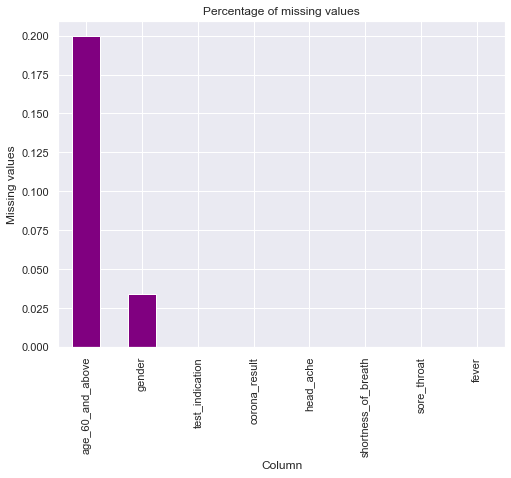

In [17]:
data.isna().mean().round(4).sort_values(ascending = False)[:8].plot(kind = 'bar', figsize = (8, 6), color = 'purple')
plt.title('Percentage of missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742596 entries, 0 to 2742595
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 209.2+ MB


In [19]:
data.gender.fillna(data.gender.mode()[0],inplace=True) 



In [20]:
data.age_60_and_above.fillna(data.age_60_and_above.mode()[0], inplace=True)

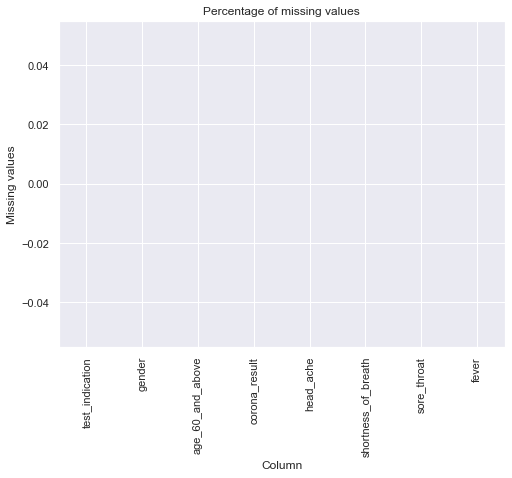

In [21]:
data.isna().mean().round(4).sort_values(ascending = False)[:8].plot(kind = 'bar', figsize = (8, 6), color = 'purple')
plt.title('Percentage of missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()

In [22]:
data.age_60_and_above.value_counts()

No     2456197
Yes     286399
Name: age_60_and_above, dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742596 entries, 0 to 2742595
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 209.2+ MB


In [24]:
num_cols = ['cough','fever','sore_throat','shortness_of_breath','head_ache']
cat_cols = ['corona_result','age_60_and_above','gender','test_indication']

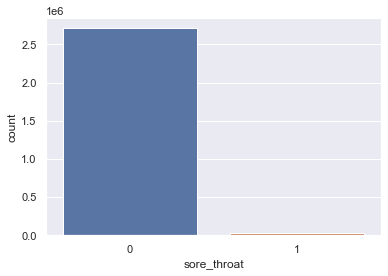

In [25]:
sns.countplot('sore_throat',data=data)

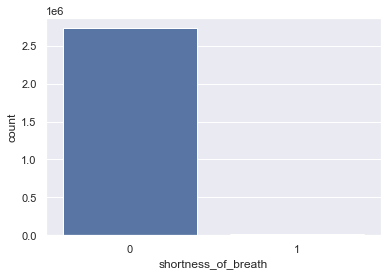

In [26]:
sns.countplot('shortness_of_breath', data=data)

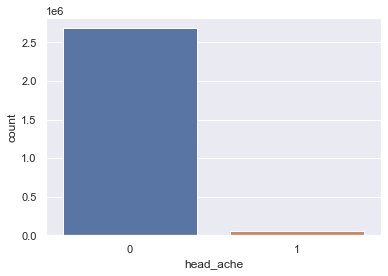

In [27]:
sns.countplot('head_ache', data = data)

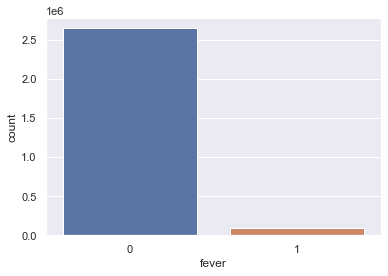

In [28]:
sns.countplot('fever', data = data)

In [29]:
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


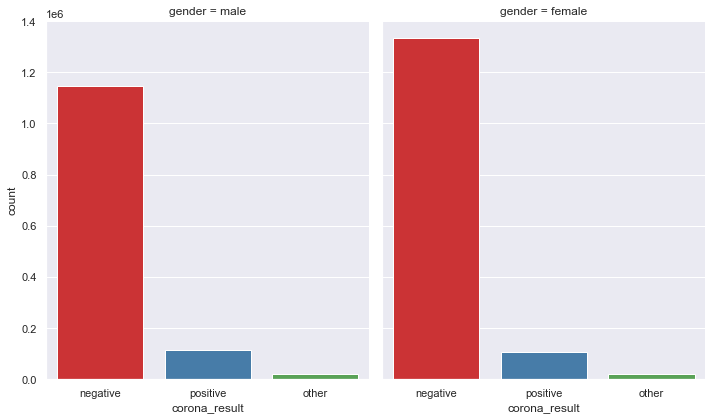

In [30]:
sns.catplot("corona_result", col="gender", col_wrap=4, data=data, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

In [31]:
data.age_60_and_above.value_counts()

No     2456197
Yes     286399
Name: age_60_and_above, dtype: int64

In [32]:
data['age_60_and_above'] = data['age_60_and_above'].map({'Yes':1,'No':0})

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742596 entries, 0 to 2742595
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     int64 
 8   gender               object
 9   test_indication      object
dtypes: int64(6), object(4)
memory usage: 209.2+ MB


# Correlogram to show correlations between variables

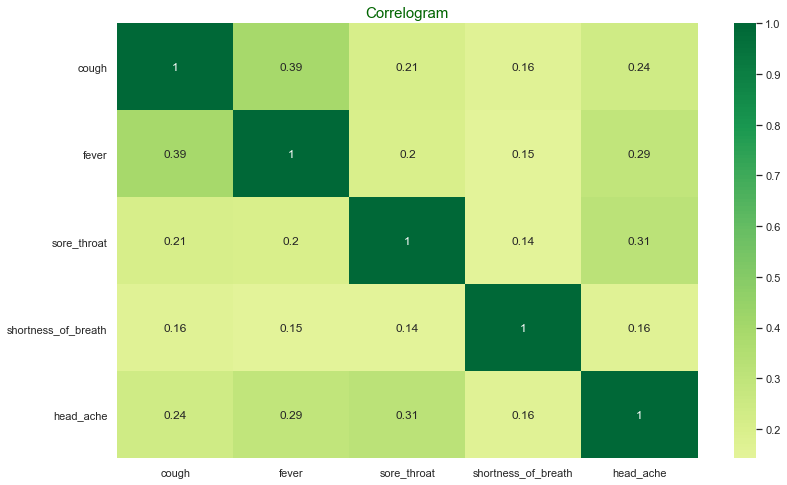

In [34]:
corr = data[['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache']].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [35]:
data.corona_result.value_counts()

negative    2480403
positive     220975
other         41218
Name: corona_result, dtype: int64

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

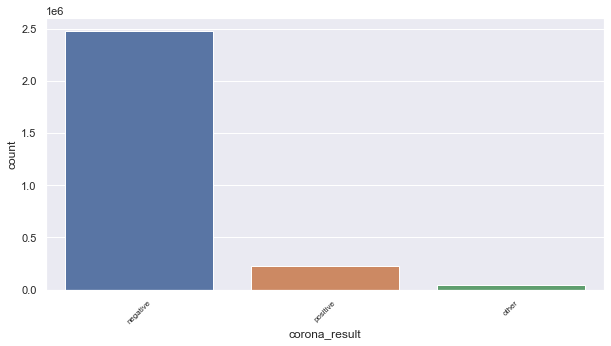

In [36]:
plt.subplots(figsize = (10,5))
sns.countplot(x = data['corona_result'],order = data['corona_result'].value_counts().index)
plt.xticks(rotation=45, fontsize=8)

# Modelling
RandomForestClassifier¶

In [37]:
data['corona_result'] = data['corona_result'].map({'negative':-1,'positive':1,'other':0})

In [38]:
key = {'negative':-1,'positive':1,'other':0}

In [39]:
key['negative']

-1

In [40]:
X = data.drop(['test_date','corona_result'], axis = 1)
y = data.corona_result

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt = DecisionTreeClassifier(max_depth=3,random_state=0)

In [43]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [44]:
pred = dt.predict(X_test)

In [45]:
from sklearn.metrics import roc_auc_score,accuracy_score

In [46]:
def Scorer(y_true,y_pred):
    from sklearn.metrics import classification_report
    print(classification_report(y_true,y_pred,digits=4))

In [47]:
accuracy_score(y_test,pred,)

0.9194607543459422

In [48]:
Scorer(y_test,pred)

              precision    recall  f1-score   support

          -1     0.9447    0.9696    0.9570    743904
           0     0.0000    0.0000    0.0000     12418
           1     0.5942    0.5299    0.5602     66457

    accuracy                         0.9195    822779
   macro avg     0.5130    0.4998    0.5057    822779
weighted avg     0.9021    0.9195    0.9105    822779



In [49]:
fi_df = pd.DataFrame(index=X.columns, data=np.round(dt.feature_importances_,4))

fi_df = fi_df.reset_index()
fi_df.columns = ['cols','imp']

In [50]:
fi_df

,cols,imp
0,cough,0.0000
1,fever,0.0852
2,sore_throat,0.0000
3,shortness_of_breath,0.0000
4,head_ache,0.1938
5,age_60_and_above,0.0010
6,gender_female,0.0000
7,gender_male,0.0000
8,test_indication_Abroad,0.0000
9,test_indication_Contact with confirmed,0.7200


In [51]:
fi_df.sort_values(by = ['imp'],ascending=False,inplace=True)

In [52]:
fi_df.tail()

,cols,imp
3,shortness_of_breath,0.0
6,gender_female,0.0
7,gender_male,0.0
8,test_indication_Abroad,0.0
10,test_indication_Other,0.0


In [53]:
semi_useless = list(fi_df[fi_df['imp'] ==0]['cols'])

In [54]:
len(semi_useless)

7

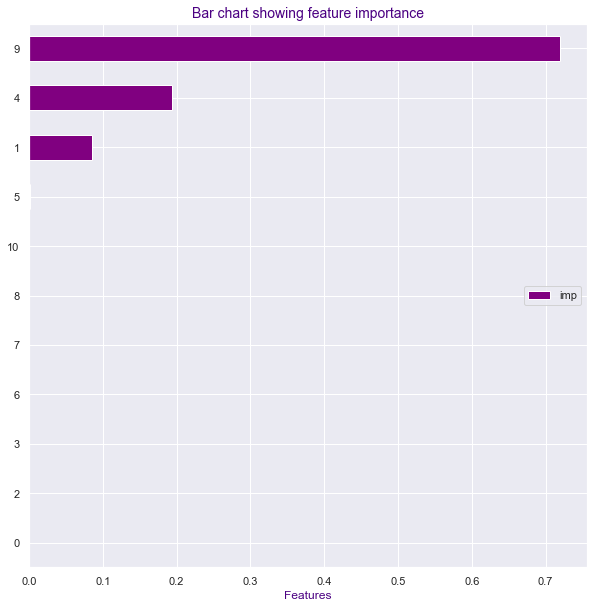

In [55]:
# Creating a bar chart of feature importance in descending order
#
fi_df = fi_df[:12].sort_values(by = 'imp', ascending = True)
fi_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

In [56]:
f1_score(y_test,pred,average='weighted')

0.9105036518295024

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1919817 entries, 1970971 to 305711
Data columns (total 11 columns):
 #   Column                                  Dtype
---  ------                                  -----
 0   cough                                   int64
 1   fever                                   int64
 2   sore_throat                             int64
 3   shortness_of_breath                     int64
 4   head_ache                               int64
 5   age_60_and_above                        int64
 6   gender_female                           uint8
 7   gender_male                             uint8
 8   test_indication_Abroad                  uint8
 9   test_indication_Contact with confirmed  uint8
 10  test_indication_Other                   uint8
dtypes: int64(6), uint8(5)
memory usage: 111.7 MB


In [58]:
train = X_train.drop(semi_useless,axis=1)
test = X_test.drop(semi_useless,axis=1)

In [59]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state = 0)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)

In [60]:
pred_rf = rf.predict(X_test)

In [61]:
accuracy_score(y_test,pred_rf)

0.9194145694044209

In [62]:
rf1 = RandomForestClassifier(n_estimators=10, max_depth=5, random_state = 0)
rf1.fit(train, y_train)


RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)

In [63]:
pred_rf = rf1.predict(test)

In [64]:
accuracy_score(y_test,pred_rf)

0.9198241569121234

In [65]:
fi_df1 = pd.DataFrame(index=X.columns, data=np.round(rf.feature_importances_,4))

fi_df1 = fi_df.reset_index()
#fi_df1.columns = ['cols','imp']

In [66]:
fi_df1

,index,cols,imp
0,0,cough,0.0000
1,2,sore_throat,0.0000
2,3,shortness_of_breath,0.0000
3,6,gender_female,0.0000
4,7,gender_male,0.0000
5,8,test_indication_Abroad,0.0000
6,10,test_indication_Other,0.0000
7,5,age_60_and_above,0.0010
8,1,fever,0.0852
9,4,head_ache,0.1938


In [67]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [68]:
pred = ada.predict(X_test)

In [69]:
accuracy_score(y_test,pred)

0.9140085004600264

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR, NuSVR
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, BayesianRidge
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, StackingClassifier,HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.cluster import KMeans
import warnings
#from rgf.sklearn import RGFClassifier
warnings.filterwarnings('ignore')

In [72]:
et = ExtraTreesClassifier()
et.fit(X_train,y_train)

ExtraTreesClassifier()

In [73]:
pred_et = et.predict(X_test)

In [74]:
accuracy_score(y_test,pred_et)

0.9213543369483178

In [108]:
dt = DecisionTreeClassifier(random_state=0,min_samples_leaf=7,max_depth=13)

In [109]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=13, min_samples_leaf=7, random_state=0)

In [110]:
pred_dt = dt.predict(X_test)

In [111]:
accuracy_score(y_test,pred_dt)

0.9213664908802971

In [68]:
lgbm = LGBMClassifier(max_depth=7,n_estimators=200)

In [69]:
lgbm.fit(X_train,y_train)

LGBMClassifier(max_depth=7, n_estimators=200)

In [70]:
pred_lgbm = lgbm.predict(X_test)

In [71]:
accuracy_score(y_test,pred_lgbm)

0.9213798602054744

In [72]:
estimators_1 = [
    
    ('lr', LogisticRegression(solver='liblinear')),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('adb', AdaBoostClassifier(random_state=42)),
    #('xgbrf', XGBRFClassifier(random_state=42)),
    ('lgb', LGBMClassifier(random_state=42))
]

m = StackingClassifier(estimators=estimators_1, final_estimator=LGBMClassifier(random_state=42)).fit(X_train,y_train)

In [73]:
predictions = m.predict(X_test)

In [76]:
accuracy_score(y_test,predictions,)

0.9213737832394847

In [56]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
impo_df1 = pd.DataFrame({'feature': X.columns, 'importance': np.round(rf.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df1

,importance
feature,
test_indication_Contact with confirmed,0.6153
head_ache,0.1154
test_indication_Other,0.0732
sore_throat,0.0726
fever,0.0696
cough,0.0298
shortness_of_breath,0.0135
test_indication_Abroad,0.0075
age_60_and_above,0.0017


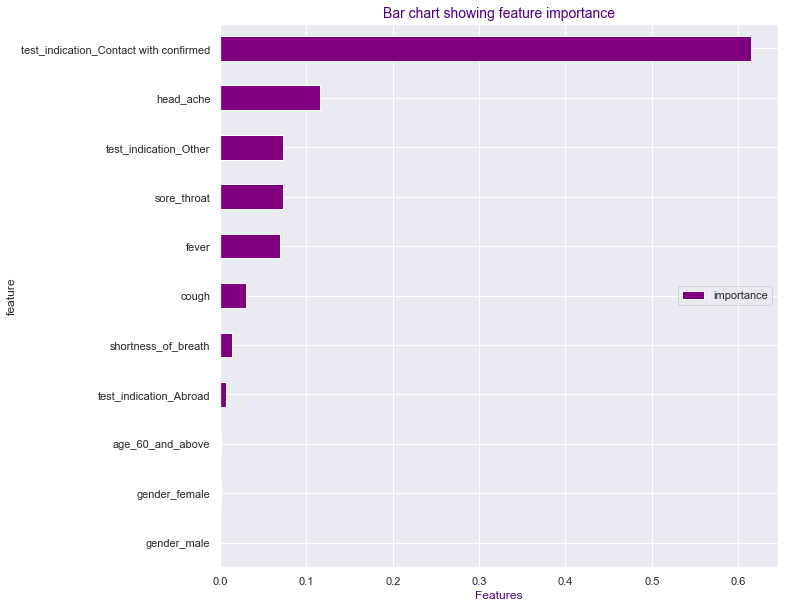

In [57]:
impo_df1 = impo_df1[:12].sort_values(by = 'importance', ascending = True)
impo_df1.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR, NuSVR
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, BayesianRidge
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, StackingClassifier,HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.cluster import KMeans
import warnings
#from rgf.sklearn import RGFClassifier
warnings.filterwarnings('ignore')

In [64]:
lgb = LGBMClassifier(max_depth=5,random_state=0)

In [65]:
lgb.fit(X_train,y_train)

LGBMClassifier(max_depth=5, random_state=0)

In [66]:
pred_lgb = lgb.predict(X_test)

In [67]:
accuracy_score(Y_test,pred_lgb,)

NameError: name 'Y_test' is not defined

In [ ]:
stimators_1 = [
    
    ('lr', LogisticRegression(solver='liblinear')),
    ('rf', RandomForestClassifier(random_state=42)),
    #('lgb', LGBMClassifier(learning_rate=0.2, random_state=42)),
    #('svr', SVC(degree=2)),
    #('RGF', RGFClassifier()),
    ('kneiba', KNeighborsClassifier(n_neighbors=4)),
    ('nb',MultinomialNB()),
    ('xgb', XGBClassifier(random_state=42)),
    #('cat', CatBoostRegressor(logging_level='Silent', random_state=42))
]

m = StackingClassifier(estimators=estimators_1, final_estimator=XGBClassifier(random_state=42)).fit(X_train_dtm,y_train)

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0)
lr.fit(X_train,y_train)

LogisticRegression()

In [54]:
preds = lr.predict_proba(X_train)[:,1]

In [59]:
from sklearn.metrics import roc_auc_score,accuracy_score


In [60]:
def Scorer(y_true,y_pred):
    from sklearn.metrics import classification_report
    print(classification_report(y_true,y_pred,digits=4))

In [62]:
pred = lr.predict(X_test)

In [63]:
Scorer(y_test,pred)

              precision    recall  f1-score   support

          -1     0.9240    0.9879    0.9549    743904
           0     0.0000    0.0000    0.0000     12418
           1     0.6514    0.2685    0.3803     66457

    accuracy                         0.9149    822779
   macro avg     0.5251    0.4188    0.4451    822779
weighted avg     0.8880    0.9149    0.8941    822779



In [67]:
accuracy_score(y_test,y_pred,)

0.9213616293075054

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [77]:
pred = rf.predict(X_test)

In [79]:
accuracy_score(y_test,pred,)

0.921368921666693